# Tensorflow notes

We illustrate a few utilities and functionality

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

#### Model summary

In [3]:
model = keras.models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape = (784,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,466 (263.54 KB)

 Trainable params: 67,466 (263.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Functional API

Same model

In [4]:
inputs = keras.Input(shape=(784,))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,466 (263.54 KB)

 Trainable params: 67,466 (263.54 KB)

 Non-trainable params: 0 (0.00 B)

Can get model and layer outputs. Typically we would want to have trained our model first. If not, will use the initialization weights.

In [9]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,466 (263.54 KB)

 Trainable params: 67,466 (263.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import numpy as np
data = np.random.normal(0, 2, 1280).reshape(10, 128)

model.layers[3](data)

<tf.Tensor: shape=(10, 64), dtype=float32, numpy=
array([[2.1193566 , 0.        , 4.459452  , 1.7968265 , 0.        ,
        3.1262434 , 1.7533088 , 0.        , 0.28184533, 0.6635741 ,
        3.297966  , 4.4117312 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.0421712 , 1.009255  ,
        0.        , 3.0301225 , 0.        , 0.44077423, 0.12919866,
        1.7604195 , 0.        , 0.        , 1.4710821 , 1.750342  ,
        1.3164033 , 0.38877496, 0.9994884 , 0.7065741 , 2.5336568 ,
        3.9963708 , 1.0593308 , 2.918494  , 0.        , 0.22716898,
        0.        , 2.216933  , 0.        , 0.53785896, 3.6268501 ,
        0.        , 0.        , 0.8187813 , 0.        , 0.        ,
        3.6184325 , 2.6557684 , 2.148819  , 1.2243296 , 0.88846195,
        0.        , 0.43570036, 5.2269335 , 0.        , 0.        ,
        0.        , 0.        , 1.9382727 , 2.20032   ],
       [0.7952605 , 1.095631  , 0.        , 1.6406809 , 0.        ,
        0

## Try `mnist` data

Why do we need to reshape the data? Note we could alternatively use a flatten layer

In [10]:
from keras.optimizers import SGD, RMSprop, Adam
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32').reshape(60000, 28*28) / 255.0
x_test = x_test.astype('float32').reshape(10000, 28*28)  / 255.0

# Compile the model with a small learning rate
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])




In [11]:


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9113 - loss: 0.3160 - val_accuracy: 0.9416 - val_loss: 0.2358
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.9446 - loss: 0.2113 - val_accuracy: 0.9516 - val_loss: 0.1882
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.9524 - loss: 0.1860 - val_accuracy: 0.9559 - val_loss: 0.1804
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.9577 - loss: 0.1751 - val_accuracy: 0.9545 - val_loss: 0.1951
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.9601 - loss: 0.1625 - val_accuracy: 0.9495 - val_loss: 0.2374
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9620 - loss: 0.1565 - val_accuracy: 0.9581 - val_loss: 0.1738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.9632 - loss: 0.1503 - val_accuracy: 0.9556 - val_loss: 0.1938
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.9661 - los

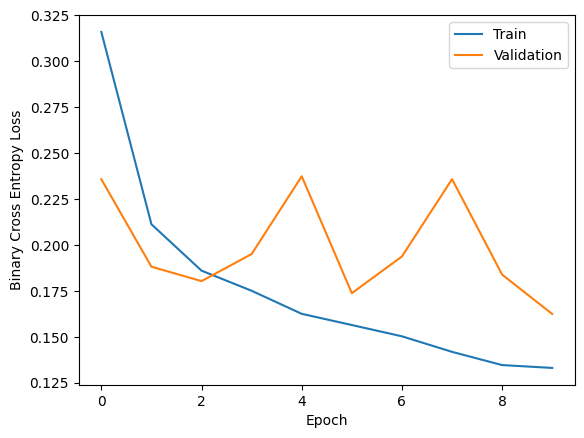

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [9]:
model.evaluate(x_test,  y_test, batch_size=64)

157/157 [==============================] - 0s 497us/step - loss: 0.2083 - accuracy: 0.9616


[0.20826353132724762, 0.9616000056266785]


#### Early stopping

In [10]:
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam

model.compile(optimizer= "adam",
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy", 'sparse_categorical_accuracy'])

callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
                    ]
model.fit(x=x_train, 
          y=y_train, 
          epochs=2, 
          validation_data=(x_test, y_test),
                           callbacks=callbacks_list
          ) 
        

Epoch 1/2
1875/1875 [==============================] - 2s 891us/step - loss: 0.0823 - accuracy: 0.9799 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.1590 - val_accuracy: 0.9705 - val_sparse_categorical_accuracy: 0.9705
Epoch 2/2
1875/1875 [==============================] - 2s 855us/step - loss: 0.0609 - accuracy: 0.9837 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.1531 - val_accuracy: 0.9708 - val_sparse_categorical_accuracy: 0.9708


#### Learning rate decay.
Can set  constant decay for some optimizers

In [13]:
from keras.optimizers import SGD

# create a SGD optimizer with learning rate of 0.01 and decay of 1e-6
optimizer = SGD(learning_rate =0.01, decay=1e-6)

/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


or define your own like this

In [14]:
from keras.callbacks import LearningRateScheduler

# define a function for the learning rate schedule
def schedule(epoch, lr):
    return lr * 0.9

# create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(schedule)

# use the callback in the model.fit() function
model.fit(x_train, y_train, epochs=2, callbacks=[lr_scheduler])

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9722 - loss: 0.1155 - learning_rate: 0.0090
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.9743 - loss: 0.1061 - learning_rate: 0.0081


### momentum

Note that Adam, Nadam have ema, beta1, beta2

In [16]:
optimizer = SGD(learning_rate =0.01, decay=1e-6, momentum= 0.9)

In [17]:
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam


model.compile(optimizer= SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy", 'sparse_categorical_accuracy'])

                
model.fit(x=x_train, 
          y=y_train, 
          epochs=2, 
          validation_data=(x_test, y_test)
          ) 

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0753 - sparse_categorical_accuracy: 0.9804 - val_accuracy: 0.9720 - val_loss: 0.1403 - val_sparse_categorical_accuracy: 0.9720
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9834 - loss: 0.0630 - sparse_categorical_accuracy: 0.9834 - val_accuracy: 0.9728 - val_loss: 0.1442 - val_sparse_categorical_accuracy: 0.9728


#### Layers, learning rate, Functional API, 



In [18]:
from keras import callbacks

callbacks_list = [callbacks.EarlyStopping(monitor='val_loss', patience=5),
                  lr_scheduler]

optimizer = keras.optimizers.SGD()
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Can call layers. You might do this for other than simple feed forward architectures. Dimensions of the the layer and what you call it on must match.

In [19]:
model.layers[1](x_train)

<tf.Tensor: shape=(60000, 64), dtype=float32, numpy=
array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 6.616946 , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 3.3650503,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], shape=(60000, 64), dtype=float32)>

Weight decay below is applied after each update of the weights, so after each batch.

In [20]:
model.optimizer = keras.optimizers.SGD(learning_rate=0.01, weight_decay=1e-6, momentum=0.9)

#### Saving a model

See also https://keras.io/api/callbacks/model_checkpoint/

In [21]:
callbacks_list = [callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True)]

Check if the model is saved. It will save in the current working directory. `h5` is a file format for large data sets.

In [22]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=2, 
          validation_data=(x_test, y_test),
          callbacks=callbacks_list
          ) 

Epoch 1/2
1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.9849 - loss: 0.0554

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0585 - val_accuracy: 0.9728 - val_loss: 0.1323
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.9848 - loss: 0.0553 - val_accuracy: 0.9720 - val_loss: 0.1468


In [23]:
tf.keras.models.load_model('model.h5')

<Functional name=functional_4, built=True>